# Coherent Diffraction Imaging

This is the initial notebook and home for the CDI workflow.

WiFi Pass: 4$tr0ngL@s3r

## Outline
 - Get diffraction images (point to directory)
 - Preprocessing
 - CDI Algorithm
     - Google Cloud platform?
 - Convert raw image data to desired file format
     - bitmap? gds (common semiconductor file format)?
     
## Theory/Overview

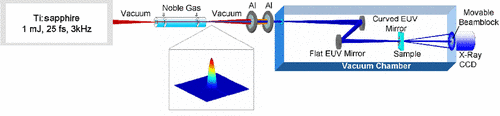
Figure 1
Experimental setup for lensless imaging using coherent high harmonic beams at a wavelength of 29 nm. A single harmonic order is selected and focused using a pair of normal-incidence multilayer mirrors. The sample stage is positioned near the focus, where it scatters the soft-x-ray beam onto a CCD. Inset: measured logarithmically scaled soft-x-ray beam profile that is a near-Gaussian TEM00 over 4 orders of magnitude.
  
  title = {Lensless Diffractive Imaging Using Tabletop Coherent High-Harmonic Soft-X-Ray Beams},
  doi = {10.1103/PhysRevLett.99.098103},
  url = {https://link.aps.org/doi/10.1103/PhysRevLett.99.098103}


### Apparatus: Important Terms and Equations

 - Sample distance from CCD:
 \begin{equation*}
 z > \frac{D^2}{\lambda}
 \end{equation*}
 
     $z = $ sample to CCD distance, 
     $D = $ sample diameter,
     $\lambda = $ wavelength; 


 - Linear Oversampling Ratio:
 \begin{equation*}
 O = \frac{z\lambda}{pD}
 \end{equation*}
 
 $p = $ pixel size of CCD camera
 
     - The sample must be placed far enough from the detector to guarantee a far field diffraction pattern... z is chosen to give linear oversampling ratio > 5 for easy reconstruction and high resolution.


 - Image pixel size:
 \begin{equation*}
 d = \frac{z\lambda}{pN}
 \end{equation*}
 
 $N = $ number of (camera?) pixels, is ultimate resolution for any given geometry
 
     - I think this is because we're working pre-FT space, certain diffraction patterns will occupy a larger number of pixels?
 
 
 - resolution:
 \begin{equation*}
 r \geq \frac{OD}{\lambda/\Delta\lambda}
 \end{equation*}
 
 $\lambda/\Delta\lambda = $ spectral bandwidth of the source.
 
     - From: https://journals.aps.org/prb/abstract/10.1103/PhysRevB.67.174104

## Reconstruction

### Guided Hybrid Input Output (GHIO)

https://journals.aps.org/prb/abstract/10.1103/PhysRevB.75.012102

 - Starts with 16 independent reconstructions where random initial phases are used as input.
 - Iterates btwn real and reciprocal space, 
     - In real space, reducing the sample density outside of the support (rectangular area containing the sample) and the negative electron density inside the support to zero.
     - In reciprocal space magnitude is unchanged, phase is updated.
 - After 2000 iterations, 16 images are reconstructed (0th generation). A R value is calculated for each, based on the difference between the measured and calculated magnitude of the Fourier transform.
 - seed = min(genZeroImages, lambda x: R)
 - genN+1Images = sqrt (genNImages[i] * seed) for i in range(16).
 - after generation 8, images are consistent
 - from gen 8, define a tight support (the 'true envelope' of the object)
 - repeat GHIO with tight support.
 
### ePIE/ACR

https://www.cambridge.org/core/services/aop-cambridge-core/content/view/80D3006EEEE251C216E0358C0FF7937D/S1431927617000861a.pdf/wide_fieldofview_reflectionmode_ptychographic_imaging_microscope_with_tabletop_127_nm_high_harmonic_illumination.pdf

ePIE - extended Ptychographic retrieval engine (http://xrm.phys.northwestern.edu/research/pdf_papers/2009/maiden_ultramic_2009.pdf)

ACR - amplitude constraint relaxation !!!find out about this!!!
 

## Questions
 - Should we raster the sample or the beam?
     - The beam seems like the easier choice; however, this would require moving the beam blocks and potentially the camera... right?
     - Maybe not, since the images are taken using a pair of beam blocks: > 1mm for long exposure images, < 200 micron for low spatial frequencies... and, they're mounted in a 2 inch diameter kinematic x-y lens translator.
     - Example acquisition: 
         - 60 second exposure w/o beam block.
         - 600 second exposure w/ 200 micron block
         - 7200 second exposure w/ 3 mm block
    

     